In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv')

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df.sample(5)

,label,text
2063,1,pleasure your women - size does matter !\nhttp...
16830,0,because of unique aspects of their language an...
62501,0,begin pgp signed message hash shaescapenumber...
60862,1,treat yourself and your woman to a marvelous s...
80935,1,the undoubted energetic beauty of soon the dec...


In [9]:
df.shape

(83448, 2)

In [11]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [8]:
df.sample(5)

,label,text
71844,0,"daren ,\nkcs wants to take their nom down from..."
55702,0,if you get the running process to write its re...
13117,1,also on msn : start chattingilisten to musicih...
2997,0,"over the last few months , we have been discus..."
37883,1,landing places along the coast but no proper h...


In [12]:
# renaming the cols
df.rename(columns={'label':'target'},inplace=True)
df.sample(5)

,target,text
50155,1,dear valued member more and more people are ge...
53344,0,start date : 2 / 5 / 02 ; hourahead hour : 16 ...
50625,1,cancels fall pdc eweek around resource center ...
43086,1,believed or pretended to believe that her husb...
44234,1,hi ladies get approved for financing today whe...


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [15]:
# missing values
df.isnull().sum()

,0
target,0
text,0


In [16]:
# check for duplicate values
df.duplicated().sum()

np.int64(0)

In [17]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(83448, 2)

## 2.EDA

In [20]:
df.head()

,target,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [21]:
df['target'].value_counts()

,count
target,
1,43910
0,39538


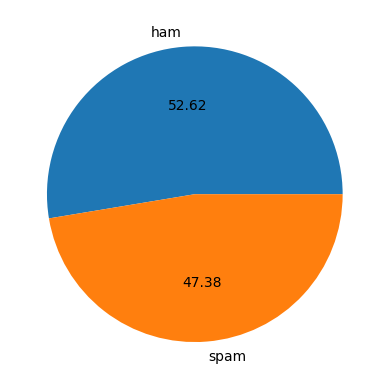

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [23]:
# Data is imbalanced

In [24]:
import nltk

In [25]:
!pip install nltk

In [26]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
df['num_characters'] = df['text'].apply(len)

In [28]:
df.head()

,target,text,num_characters
0,1,ounce feather bowl hummingbird opec moment ala...,148
1,1,wulvob get your medircations online qnb ikud v...,808
2,0,computer connection from cnn com wednesday es...,2235
3,1,university degree obtain a prosperous future m...,592
4,0,thanks for all your answers guys i know i shou...,1362


In [29]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,1,ounce feather bowl hummingbird opec moment ala...,148,20,1
1,1,wulvob get your medircations online qnb ikud v...,808,104,1
2,0,computer connection from cnn com wednesday es...,2235,338,1
3,1,university degree obtain a prosperous future m...,592,76,1
4,0,thanks for all your answers guys i know i shou...,1362,223,1


In [31]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,1,ounce feather bowl hummingbird opec moment ala...,148,20,1
1,1,wulvob get your medircations online qnb ikud v...,808,104,1
2,0,computer connection from cnn com wednesday es...,2235,338,1
3,1,university degree obtain a prosperous future m...,592,76,1
4,0,thanks for all your answers guys i know i shou...,1362,223,1


In [33]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,83448.000000,83448.000000,83448.000000
mean,1662.952725,285.022733,7.250060
std,4178.578068,727.032941,34.832317
min,1.000000,1.000000,1.000000
25%,449.000000,80.000000,1.000000
50%,879.000000,154.000000,1.000000
75%,1861.000000,314.000000,5.000000
max,598705.000000,101984.000000,3093.000000


In [34]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,39538.000000,39538.000000,39538.000000
mean,2121.693814,367.659467,8.137362
std,5666.075286,986.766959,42.112956
min,1.000000,1.000000,1.000000
25%,579.000000,107.000000,1.000000
50%,1139.000000,202.000000,1.000000
75%,2174.000000,381.000000,6.000000
max,598705.000000,101984.000000,2827.000000


In [35]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,43910.000000,43910.000000,43910.000000
mean,1249.887247,210.613915,6.451105
std,1978.631507,340.723605,26.599623
min,1.000000,1.000000,1.000000
25%,360.000000,62.000000,1.000000
50%,704.000000,122.000000,1.000000
75%,1510.000000,250.000000,5.000000
max,144087.000000,25444.000000,3093.000000


In [36]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

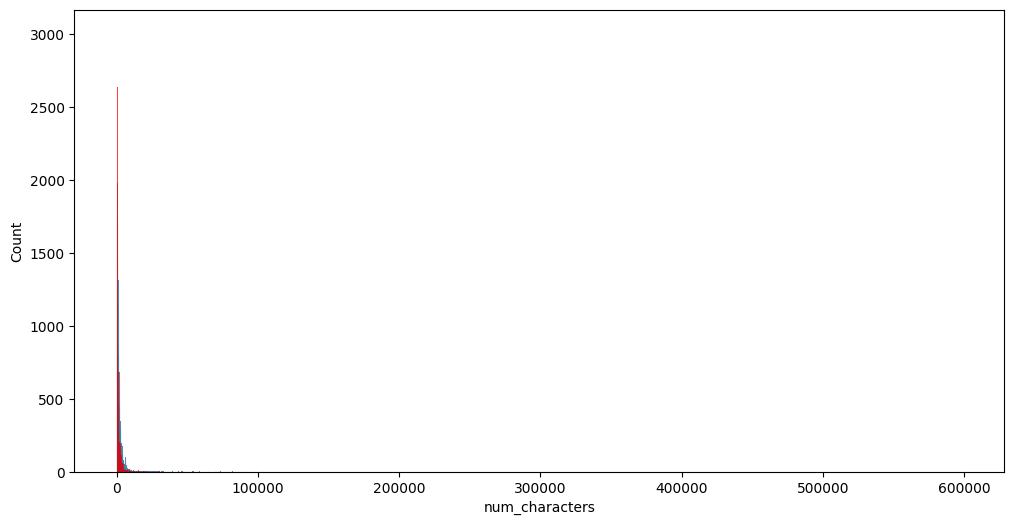

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

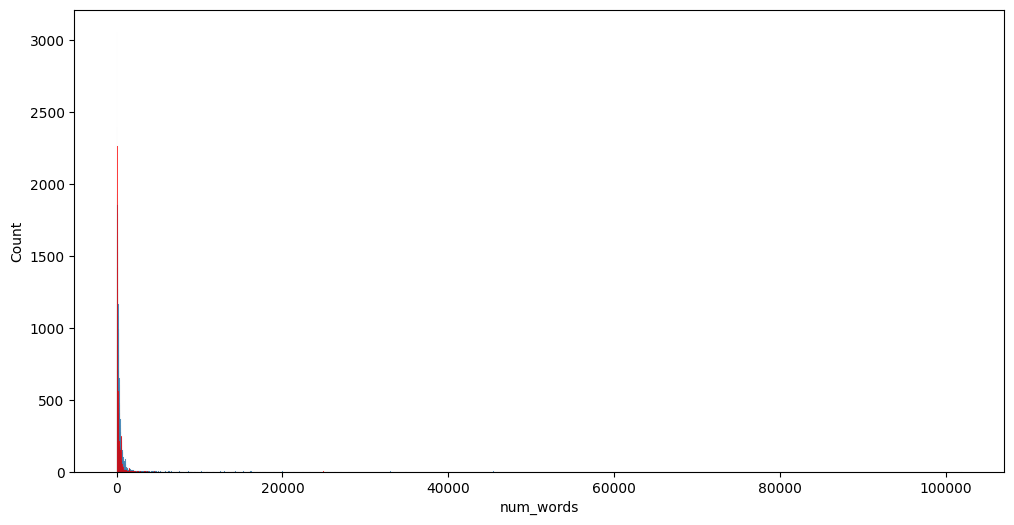

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

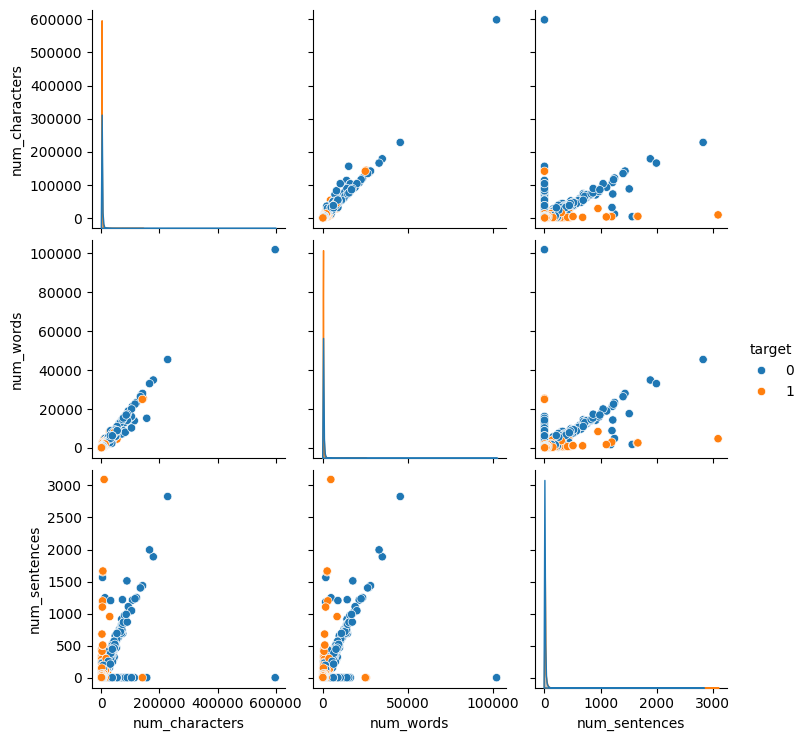

In [39]:
sns.pairplot(df,hue='target')

<Axes: >

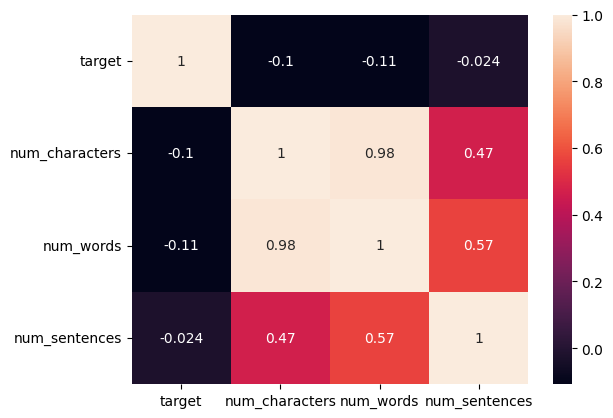

In [40]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [42]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [43]:
transform_text("hi my name is nisar ahmad")

'hi name nisar ahmad'

In [44]:
df['text'][10]

'my dear fellow do you feel insecure about your penis size you need our new improved megadik penis enlargement pills please read on did you know megadik was featured in leading mens magazines such as fhm maxim plus many others and rated no escapenumber choice for penis enlargement » gain escapenumber inches in length » increase your penis width girth by upto escapenumber » produce stronger rock hard erections » escapenumber safe to take with no side effects » doctor approved and recommended » fast shipping worldwide you have nothing to lose just a lot to gain http slasy net regards escapelong remains in escapelong use escapenumberf milliescapenumberns escapenumberf peescapenumberple in this wescapenumberrld i am escapelong man and alescapenumberng with all thescapenumberse milliescapenumberns although far from perfect especially in that it precludes a vast waldron'

In [45]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('nisar')

'nisar'

In [51]:
df['transformed_text'] = df['text'].apply(transform_text)

In [52]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,ounce feather bowl hummingbird opec moment ala...,148,20,1,ounc feather bowl hummingbird opec moment alab...
1,1,wulvob get your medircations online qnb ikud v...,808,104,1,wulvob get medirc onlin qnb ikud viagra escape...
2,0,computer connection from cnn com wednesday es...,2235,338,1,comput connect cnn com wednesday escapenumb ma...
3,1,university degree obtain a prosperous future m...,592,76,1,univers degre obtain prosper futur money earn ...
4,0,thanks for all your answers guys i know i shou...,1362,223,1,thank answer guy know check rsync manual would...


In [53]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [54]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

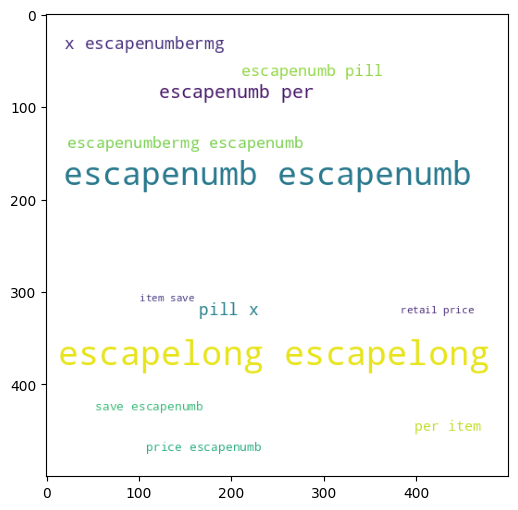

In [55]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [56]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

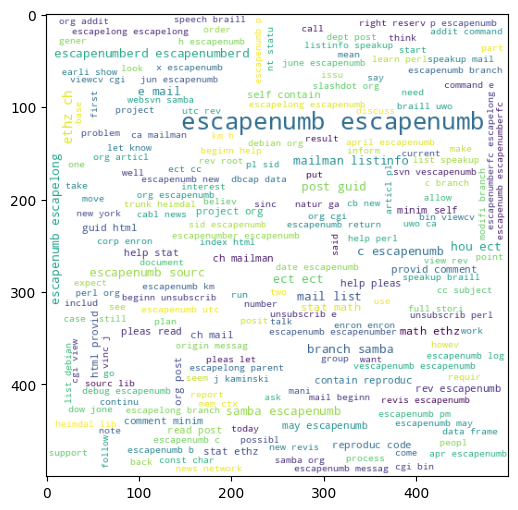

In [57]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [58]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,ounce feather bowl hummingbird opec moment ala...,148,20,1,ounc feather bowl hummingbird opec moment alab...
1,1,wulvob get your medircations online qnb ikud v...,808,104,1,wulvob get medirc onlin qnb ikud viagra escape...
2,0,computer connection from cnn com wednesday es...,2235,338,1,comput connect cnn com wednesday escapenumb ma...
3,1,university degree obtain a prosperous future m...,592,76,1,univers degre obtain prosper futur money earn ...
4,0,thanks for all your answers guys i know i shou...,1362,223,1,thank answer guy know check rsync manual would...


In [59]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [60]:
len(spam_corpus)

5516343

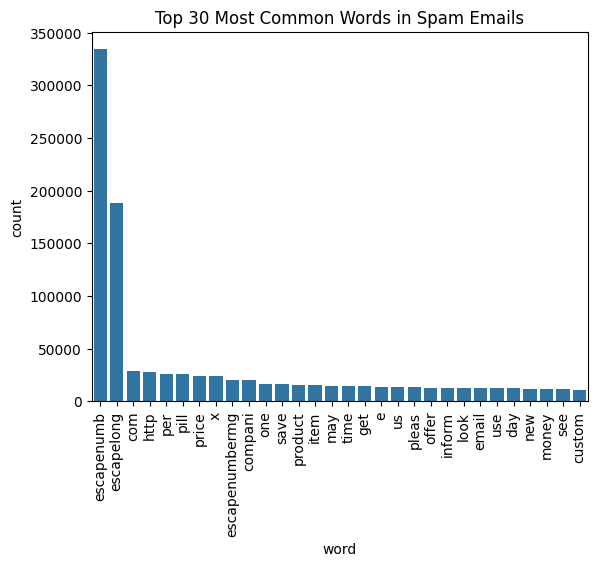

In [61]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

spam_df = pd.DataFrame(
    Counter(spam_corpus).most_common(30),
    columns=['word', 'count']
)
sns.barplot(data=spam_df, x='word', y='count')
plt.xticks(rotation=90)
plt.title('Top 30 Most Common Words in Spam Emails')
plt.show()

In [62]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [63]:
len(ham_corpus)

9067901

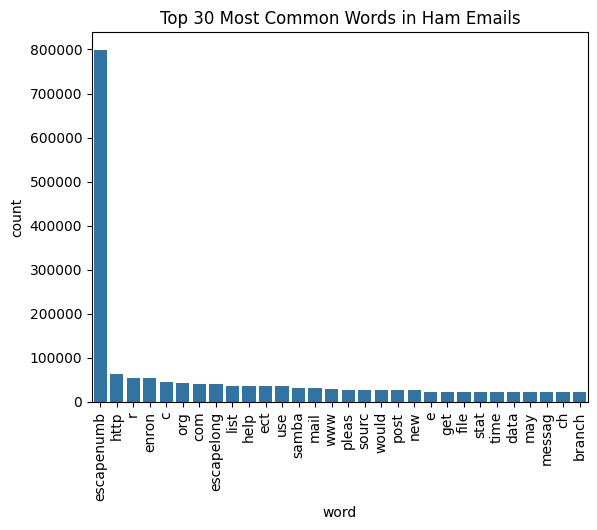

In [64]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ham_df = pd.DataFrame(
    Counter(ham_corpus).most_common(30),
    columns=['word', 'count']
)
sns.barplot(data=ham_df, x='word', y='count')
plt.xticks(rotation=90)
plt.title('Top 30 Most Common Words in Ham Emails')
plt.show()

In [65]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,ounce feather bowl hummingbird opec moment ala...,148,20,1,ounc feather bowl hummingbird opec moment alab...
1,1,wulvob get your medircations online qnb ikud v...,808,104,1,wulvob get medirc onlin qnb ikud viagra escape...
2,0,computer connection from cnn com wednesday es...,2235,338,1,comput connect cnn com wednesday escapenumb ma...
3,1,university degree obtain a prosperous future m...,592,76,1,univers degre obtain prosper futur money earn ...
4,0,thanks for all your answers guys i know i shou...,1362,223,1,thank answer guy know check rsync manual would...


## 4. Model Building

In [66]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [67]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [68]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [70]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [69]:
X.shape

(83448, 3000)

In [71]:
y = df['target'].values

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [74]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [75]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [76]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9588376273217496
[[7476  436]
 [ 251 8527]]
0.9513555729108557


In [77]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9547034152186938
[[7510  402]
 [ 354 8424]]
0.9544527532290958


In [78]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8980826842420612
[[6690 1222]
 [ 479 8299]]
0.8716521373805273


In [80]:
# tfidf --> MNB

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [80]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [92]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [93]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [83]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9329538645895746, 0.9341344518762045)

In [84]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9329538645895746
Precision -  0.9341344518762045
For  KN
Accuracy -  0.8615937687237867
Precision -  0.7956664838178826
For  NB
Accuracy -  0.9547034152186938
Precision -  0.9544527532290958
For  DT
Accuracy -  0.854823247453565
Precision -  0.796823914058851
For  LR
Accuracy -  0.9791491911324146
Precision -  0.9714765100671141
For  RF
Accuracy -  0.9820850808867585
Precision -  0.9793103448275862
For  AdaBoost
Accuracy -  0.879388855602157
Precision -  0.8327594687653713


KeyboardInterrupt: 

In [94]:
algorithms = list(clfs.keys())

performance_df = pd.DataFrame({
    'Algorithm': algorithms[:len(accuracy_scores)],
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})


In [96]:
y_pred = clf.predict(X_test)
precision_score(y_test, y_pred, zero_division=0)


0.9341344518762045

In [97]:
import pandas as pd

performance_df = pd.DataFrame({
    'Algorithm': [],
    'Accuracy': [],
    'Precision': []
})

performance_df1 = pd.melt(performance_df, id_vars="Algorithm")


In [99]:
performance_df1

,Algorithm,variable,value


In [104]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
import pandas as pd

# Classifiers
clfs = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Results list
results = []

# Train & predict
for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results.append({
        'Algorithm': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0)
    })

# Create DataFrame
performance_df = pd.DataFrame(results)


In [106]:
performance_df1 = pd.melt(
    performance_df,
    id_vars='Algorithm',
    value_vars=['Accuracy', 'Precision']
)


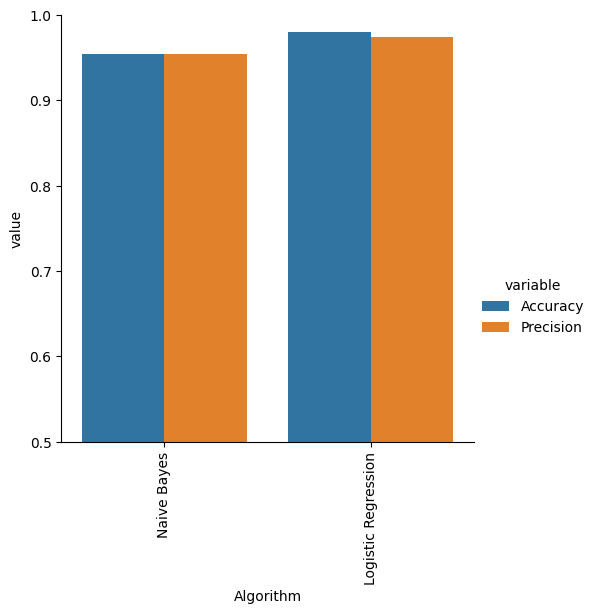

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(
    x='Algorithm',
    y='value',
    hue='variable',
    data=performance_df1,
    kind='bar',
    height=5
)

plt.ylim(0.5, 1.0)
plt.xticks(rotation=90)
plt.show()


In [109]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [112]:
from sklearn.metrics import accuracy_score, precision_score
import pandas as pd

results = []

for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results.append({
        'Algorithm': name,
        'Accuracy_max_ft_3000': accuracy_score(y_test, y_pred),
        'Precision_max_ft_3000': precision_score(y_test, y_pred, zero_division=0)
    })

temp_df = pd.DataFrame(results).sort_values(
    by='Precision_max_ft_3000',
    ascending=False
)

temp_df


,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,Logistic Regression,0.979808,0.974054
0,Naive Bayes,0.954703,0.954453


In [114]:
from sklearn.metrics import accuracy_score, precision_score
import pandas as pd

results = []

for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results.append({
        'Algorithm': name,
        'Accuracy_scaling': accuracy_score(y_test, y_pred),
        'Precision_scaling': precision_score(y_test, y_pred, zero_division=0)
    })


In [115]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [116]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [120]:
from sklearn.metrics import accuracy_score, precision_score
import pandas as pd

results = []

for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results.append({
        'Algorithm': name,
        'Accuracy_num_chars': accuracy_score(y_test, y_pred),
        'Precision_num_chars': precision_score(y_test, y_pred, zero_division=0)
    })

temp_df = pd.DataFrame(results).sort_values(
    by='Precision_num_chars',
    ascending=False
)

temp_df


,Algorithm,Accuracy_num_chars,Precision_num_chars
1,Logistic Regression,0.979808,0.974054
0,Naive Bayes,0.954703,0.954453


In [121]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,Naive Bayes,0.954703,0.954453,0.954703,0.954453,0.954703,0.954453,0.954703,0.954453
1,Logistic Regression,0.979808,0.974054,0.979808,0.974054,0.979808,0.974054,0.979808,0.974054


In [122]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [123]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [124]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [125]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.975434391851408
Precision 0.9717023675310034


In [126]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [127]:
from sklearn.ensemble import StackingClassifier

In [128]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [17]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()


In [22]:
from google.colab import files
files.download('vectorizer.pkl')
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>